# Homework 3: NEO4J Graph DATABASE 

In [1]:
from neo4j import GraphDatabase, basic_auth
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os 

In [2]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 100%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [3]:
#Alessandro
driver = GraphDatabase.driver('bolt://localhost:7687', auth = basic_auth('neo4j', 'hw03'), encrypted=False)

In [4]:
session = driver.session()

# Graph

![Graph](graph.jpeg)

# Q1: TOP 10 songs

In [5]:
result_q1 = list(session.run("MATCH (p:songs_stat) \
WHERE  p.popularity > 80 RETURN p.name, p.popularity \
ORDER BY p.popularity DESC LIMIT 10;" ))

In [6]:
result_q1

[<Record p.name='drivers license' p.popularity=100>,
 <Record p.name='positions' p.popularity=96>,
 <Record p.name='Mood feat iann dior' p.popularity=96>,
 <Record p.name='BICHOTA' p.popularity=95>,
 <Record p.name='Whoopty' p.popularity=94>,
 <Record p.name='3435' p.popularity=94>,
 <Record p.name='Therefore I Am' p.popularity=94>,
 <Record p.name='WITHOUT YOU' p.popularity=94>,
 <Record p.name='LA NOCHE DE ANOCHE' p.popularity=94>,
 <Record p.name='you broke me first' p.popularity=93>]

In [7]:
title_song = []
p_score       = []
for item in range(len(result_q1)):
    title_song.append(result_q1[item][0])
    p_score.append(result_q1[item][1])
    
d_1 = {'Title Song': title_song, 'Popularity':p_score}
data_1 = pd.DataFrame(d_1)
data_1

,Title Song,Popularity
0,drivers license,100
1,positions,96
2,Mood feat iann dior,96
3,BICHOTA,95
4,Whoopty,94
5,3435,94
6,Therefore I Am,94
7,WITHOUT YOU,94
8,LA NOCHE DE ANOCHE,94
9,you broke me first,93


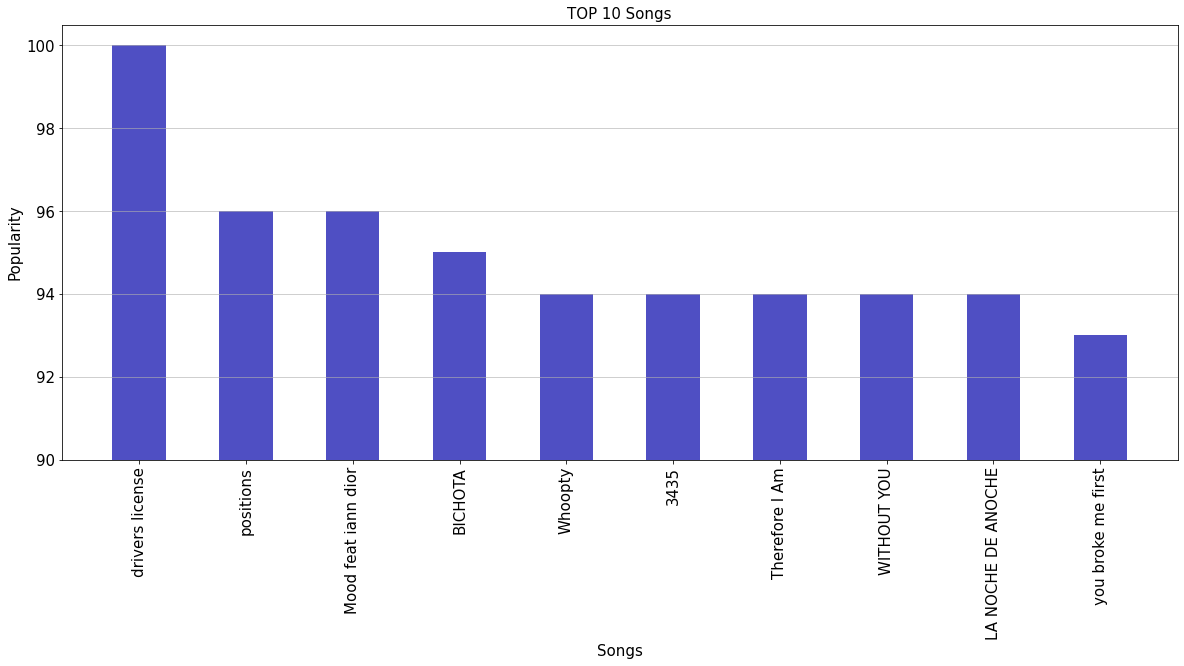

In [8]:
plt.figure(figsize=[20,8])
plt.bar(title_song,p_score, width = 0.5, color='#0504aa',alpha=0.7)
plt.ylim(90, max(p_score)+.5)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Songs',fontsize=15)
plt.ylabel('Popularity',fontsize=15)
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('Popularity',fontsize=15)
plt.title('TOP 10 Songs',fontsize=15)
plt.show()


# Q2:  Popular artists with more than 50 songs

In [43]:
result_q2 = list(session.run("\
MATCH (a:artist_not_popular) \
WHERE a.count_a>50 and a.popularity_a>55 \
RETURN a.artists_a, a.count_a, a.popularity_a \
ORDER BY a.popularity_a DESC LIMIT 10;"))

In [44]:
result_q2

[<Record a.artists_a='Harry Styles' a.count_a=52 a.popularity_a=77>,
 <Record a.artists_a='Billie Eilish' a.count_a=68 a.popularity_a=76>,
 <Record a.artists_a='DaBaby' a.count_a=69 a.popularity_a=75>,
 <Record a.artists_a='Juice WRLD' a.count_a=156 a.popularity_a=74>,
 <Record a.artists_a='XXXTENTACION' a.count_a=87 a.popularity_a=73>,
 <Record a.artists_a='Khalid' a.count_a=65 a.popularity_a=73>,
 <Record a.artists_a='Lil Peep' a.count_a=51 a.popularity_a=72>,
 <Record a.artists_a='Polo G' a.count_a=54 a.popularity_a=72>,
 <Record a.artists_a='Post Malone' a.count_a=100 a.popularity_a=72>,
 <Record a.artists_a='Halsey' a.count_a=60 a.popularity_a=71>]

In [45]:
artists    = []
count      = []
popularity = []
for item in range(len(result_q2)):
    artists.append(result_q2[item][0])
    count.append(result_q2[item][1])
    popularity.append(result_q2[item][2])
    
d_2 = {'Artists not Popular': artists,'Count': count  ,'Popularity Artist':popularity}
data_2 = pd.DataFrame(d_2)
data_2

,Artists not Popular,Count,Popularity Artist
0,Harry Styles,52,77
1,Billie Eilish,68,76
2,DaBaby,69,75
3,Juice WRLD,156,74
4,XXXTENTACION,87,73
5,Khalid,65,73
6,Lil Peep,51,72
7,Polo G,54,72
8,Post Malone,100,72
9,Halsey,60,71


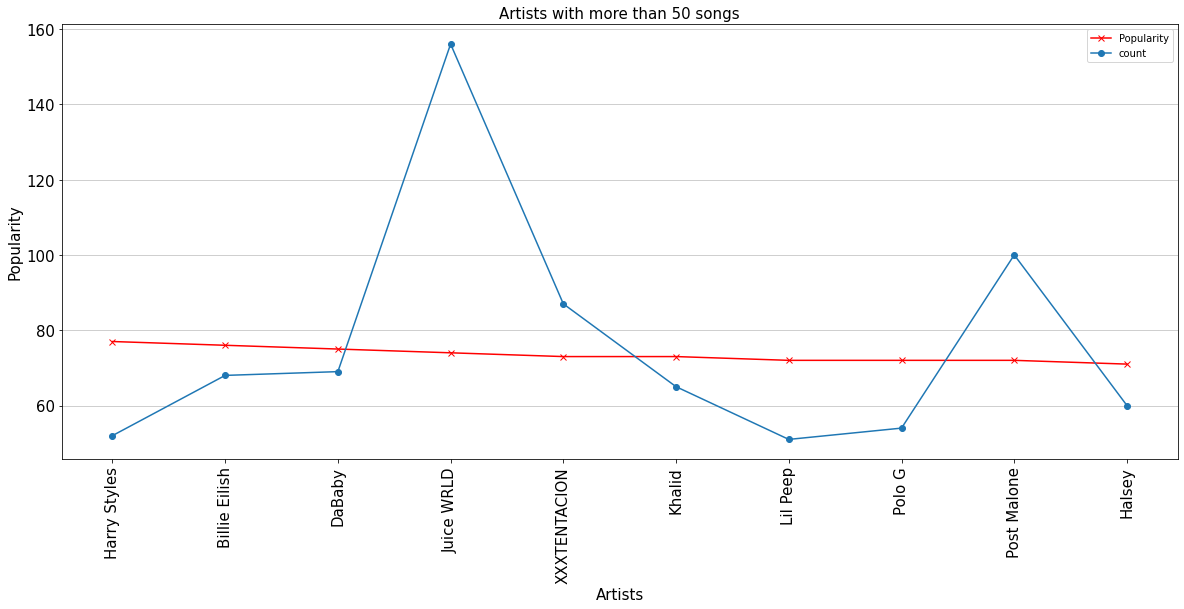

In [48]:
plt.figure(figsize=[20,8])
plt.plot(artists, popularity, '-x', color = 'red')
plt.plot(artists,count,'-o')
plt.grid(axis='y', alpha=0.75)
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('Popularity',fontsize=15)
plt.xlabel('Artists',fontsize=15)
plt.title('Artists with more than 50 songs',fontsize=15)
plt.legend(['Popularity', 'count'])
plt.show()

# Q3: Artists with most songs that are explicit

In [13]:
result_q3 = list(session.run("\
MATCH (e:songs_explicit)-[:HAS_DATA_E]->(s:songs_stat) \
RETURN e.artists, count(s.popularity) as explicit_songs \
ORDER BY explicit_songs DESC LIMIT 10;"))

In [14]:
artists    = []
d_songs      = []
for item in range(len(result_q3)):
    artists.append(result_q3[item][0])
    d_songs.append(result_q3[item][1])
d_3 = {'Explicit Artist': artists,'Explicit Songs': d_songs}
data_3 = pd.DataFrame(d_3)
data_3

,Explicit Artist,Explicit Songs
0,Eminem,311
1,SickTanicK,210
2,Mac Miller,197
3,2Pac,165
4,J Cole,158
5,Drake,157
6,TON Jayy,136
7,Kanye West,118
8,Agonoize,114
9,Post Malone,103


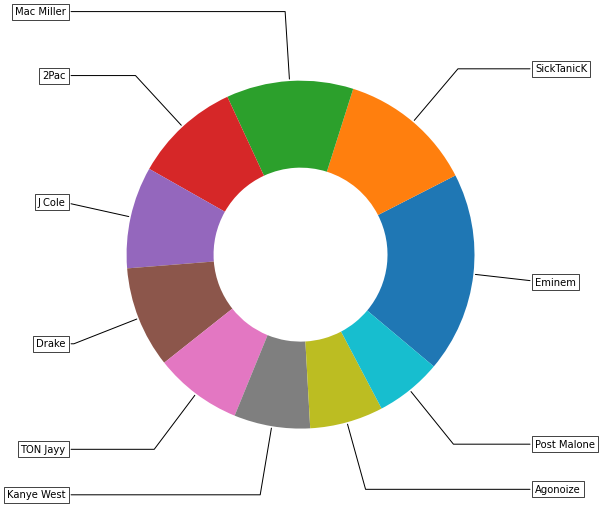

In [15]:
fig, ax = plt.subplots(figsize=(20, 8), subplot_kw=dict(aspect="equal"))
recipe = artists
data = d_songs
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
plt.show()

# Q4: Viral songs per artists

In [16]:
result_q4 = list(session.run("\
MATCH (s:songs_popular) \
RETURN s.artists, count(s.name) as tot_songs \
ORDER BY tot_songs DESC LIMIT 10;"))

In [17]:
result_q4

[<Record s.artists='Juice WRLD' tot_songs=10>,
 <Record s.artists='Bad Bunny' tot_songs=9>,
 <Record s.artists='Billie Eilish' tot_songs=9>,
 <Record s.artists='BTS' tot_songs=9>,
 <Record s.artists='Ariana Grande' tot_songs=9>,
 <Record s.artists='XXXTENTACION' tot_songs=8>,
 <Record s.artists='Taylor Swift' tot_songs=8>,
 <Record s.artists='Ed Sheeran' tot_songs=6>,
 <Record s.artists='Lewis Capaldi' tot_songs=6>,
 <Record s.artists='Harry Styles' tot_songs=6>]

In [50]:
artists    = []
p_songs    = []

for item in range(len(result_q4)):
    artists.append(result_q4[item][0])
    p_songs.append(result_q4[item][1])
    
d_4 = {'Artists': artists, 'Viral songs': p_songs}
data_4 = pd.DataFrame(d_4)
data_4

,Artists,Viral songs
0,Juice WRLD,10
1,Bad Bunny,9
2,Billie Eilish,9
3,BTS,9
4,Ariana Grande,9
5,XXXTENTACION,8
6,Taylor Swift,8
7,Ed Sheeran,6
8,Lewis Capaldi,6
9,Harry Styles,6


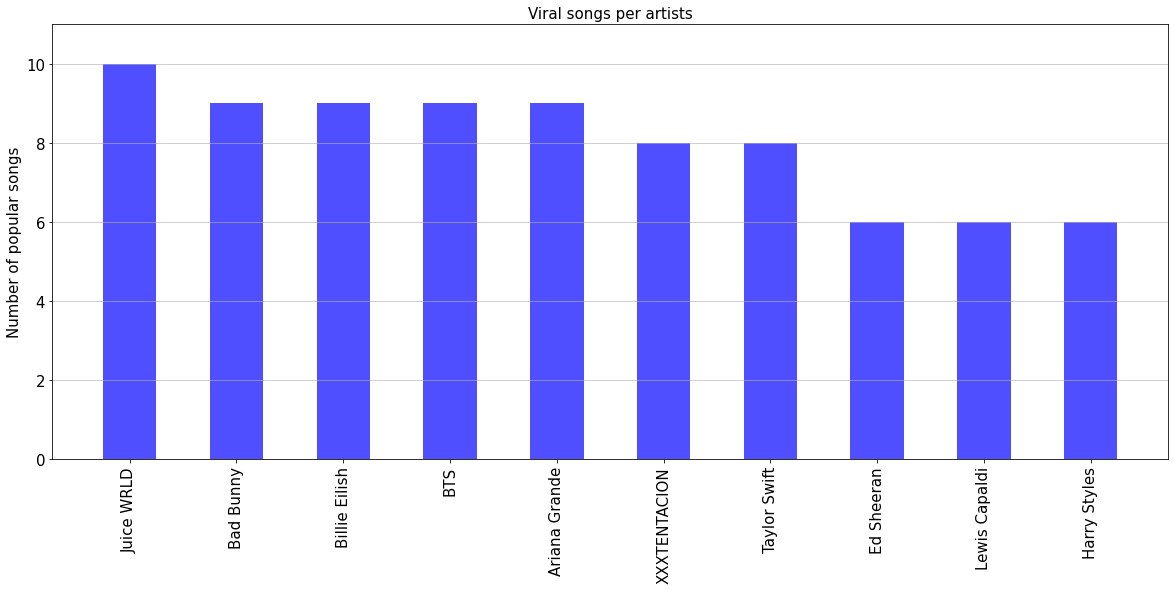

In [52]:
plt.figure(figsize=[20,8])
plt.bar(artists,p_songs, width = 0.5, color='#0504ff',alpha=0.7)
plt.ylim(0,11)
plt.grid(axis='y', alpha=0.75)
plt.ylabel('Number of popular songs',fontsize=15)
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
plt.title('Viral songs per artists',fontsize=15)
plt.show()

# Q5: Artist with popular songs who have never made explicit songs

In [53]:
result_q5 = list(session.run("\
MATCH (p:songs_popular)-[:BY]->(a:artist_popular) \
WHERE NOT EXISTS {MATCH (a)<-[:BY]-(e:songs_explicit)} \
RETURN  DISTINCT a.artists_a;"))

In [54]:
result_q5

[<Record a.artists_a='Alexander 23'>,
 <Record a.artists_a='Band Aid'>,
 <Record a.artists_a='Boza'>,
 <Record a.artists_a='Calum Scott'>,
 <Record a.artists_a='Chord Overstreet'>,
 <Record a.artists_a='Jerry Di'>,
 <Record a.artists_a='PUBLIC'>,
 <Record a.artists_a='Peach Tree Rascals'>,
 <Record a.artists_a='Regard'>,
 <Record a.artists_a='Ritt Momney'>,
 <Record a.artists_a='Sam Fischer'>,
 <Record a.artists_a='Sara Kays'>,
 <Record a.artists_a='Tones And I'>,
 <Record a.artists_a='Zoe Wees'>,
 <Record a.artists_a='salem ilese'>]

In [55]:
artists    = []
for item in range(len(result_q5)):
    artists.append(result_q5[item][0])
    
d_5 = {'Artists with no explicit songs': artists}
data_5 = pd.DataFrame(d_5)
data_5

,Artists with no explicit songs
0,Alexander 23
1,Band Aid
2,Boza
3,Calum Scott
4,Chord Overstreet
5,Jerry Di
6,PUBLIC
7,Peach Tree Rascals
8,Regard
9,Ritt Momney


# Q6: Most popular songs by Billie Eilish

In [23]:
result_q6 = list(session.run("\
MATCH (p:songs_popular)-[:HAS_DATA]->(s:songs_stat) \
WHERE p.artists='Billie Eilish' \
RETURN p.name, s.popularity \
ORDER BY s.popularity DESC"))

In [24]:
result_q6

[<Record p.name='Therefore I Am' s.popularity=94>,
 <Record p.name='bad guy' s.popularity=87>,
 <Record p.name='everything i wanted' s.popularity=86>,
 <Record p.name='when the partys over' s.popularity=85>,
 <Record p.name='ocean eyes' s.popularity=81>,
 <Record p.name='i love you' s.popularity=81>,
 <Record p.name='my future' s.popularity=81>,
 <Record p.name='idontwannabeyouanymore' s.popularity=80>,
 <Record p.name='No Time To Die' s.popularity=80>,
 <Record p.name='ocean eyes' s.popularity=67>]

In [25]:
p_songs    = []
popularity = []

for item in range(len(result_q6)):
    p_songs.append(result_q6[item][0])
    popularity.append(result_q6[item][1])
    
d_6 = {'Popular songs (by Billie Eilish)': p_songs,'Popularity': popularity}
data_6 = pd.DataFrame(d_6)
data_6

,Popular songs (by Billie Eilish),Popularity
0,Therefore I Am,94
1,bad guy,87
2,everything i wanted,86
3,when the partys over,85
4,ocean eyes,81
5,i love you,81
6,my future,81
7,idontwannabeyouanymore,80
8,No Time To Die,80
9,ocean eyes,67


# Q7: New Ranking Score

In [26]:
result_q7 = list(session.run("\
MATCH (s:songs_stat) \
WITH max(s.energy) as max_energy, max(s.liveness) as max_liveness, max(s.tempo) as max_tempo, max(s.speechiness) as max_speechiness \
MATCH (s:songs_stat)<-[:HAS_DATA]-(x) \
RETURN DISTINCT  s.popularity*((s.energy/max_energy)+(s.liveness/max_liveness)+(s.tempo/max_tempo)+(s.speechiness/max_speechiness)) as score, s.name \
ORDER BY score DESC LIMIT 15;"))

In [27]:
result_q7

[<Record score=224.59935184533447 s.name='Never Satisfied'>,
 <Record score=202.67160114163062 s.name='Empire State Of Mind'>,
 <Record score=200.3526616788443 s.name='GENOCIDE'>,
 <Record score=195.65483641079047 s.name='Rap God'>,
 <Record score=193.95153392288412 s.name='Survivor'>,
 <Record score=191.64046381079993 s.name='Before I Forget'>,
 <Record score=187.746910392173 s.name='POWER'>,
 <Record score=187.07584202657554 s.name='Camelot'>,
 <Record score=186.75121627956582 s.name='Sucker for Pain with Wiz Khalifa Imagine Dragons Logic  Ty Dolla ign feat X Ambassadors'>,
 <Record score=186.56969227751586 s.name='Nuketown feat Juice WRLD'>,
 <Record score=186.2489250938311 s.name='679 feat Remy Boyz'>,
 <Record score=185.02096253592418 s.name='Paper Planes'>,
 <Record score=184.75777392474498 s.name='Forest Rain'>,
 <Record score=184.09273883417774 s.name='Cat Girls Are Ruining My Life'>,
 <Record score=183.4946494491783 s.name='Dior'>]

In [28]:
title_song = []
score       = []
for item in range(len(result_q7)):
    title_song.append(result_q7[item][1])
    score.append(result_q7[item][0])
d_7 = {'title_song':title_song, 'score':score}
data_7 = pd.DataFrame(d_7)
data_7

,title_song,score
0,Never Satisfied,224.599352
1,Empire State Of Mind,202.671601
2,GENOCIDE,200.352662
3,Rap God,195.654836
4,Survivor,193.951534
5,Before I Forget,191.640464
6,POWER,187.746910
7,Camelot,187.075842
8,Sucker for Pain with Wiz Khalifa Imagine Drago...,186.751216
9,Nuketown feat Juice WRLD,186.569692


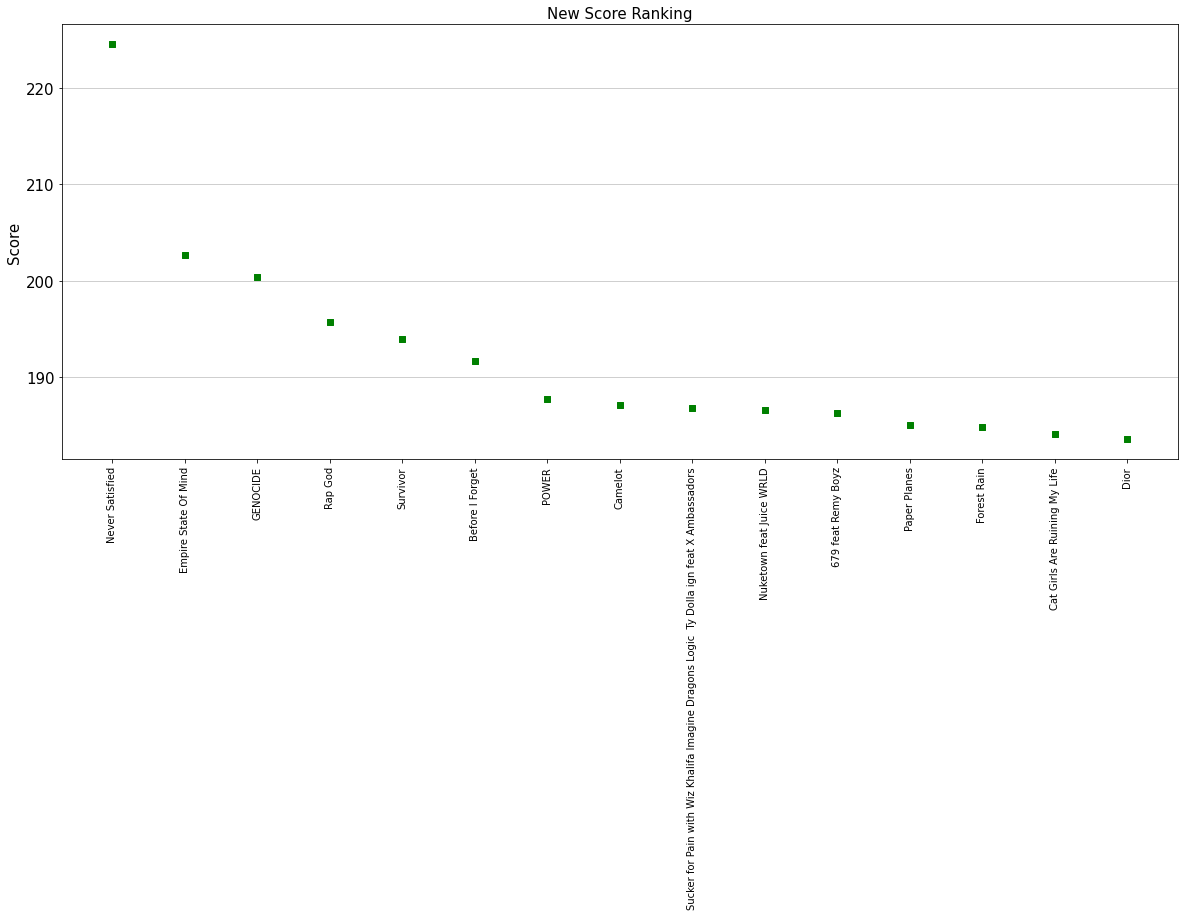

In [29]:
plt.figure(figsize=[20,8])
plt.scatter(title_song,score,color='green', marker = ",")
plt.grid(axis='y', alpha=0.75)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('Score',fontsize=15)
plt.title('New Score Ranking',fontsize=15)
plt.show()

# Q8: AVG popularity of the songs by Taylor Swift compared to the popularity of the year of realese

In [30]:
result_q8 = list(session.run("\
MATCH (p:songs_not_popular)-[:PUBLISHED]->(y:year) \
WHERE p.artists = 'Taylor Swift' \
RETURN p.year, avg(p.popularity) as pop_mean,y.popularity_y \
ORDER BY p.year;"))

In [31]:
result_q8

[<Record p.year=2006 pop_mean=54.375 y.popularity_y=42>,
 <Record p.year=2008 pop_mean=53.35294117647059 y.popularity_y=35>,
 <Record p.year=2009 pop_mean=60.0 y.popularity_y=36>,
 <Record p.year=2010 pop_mean=54.76470588235294 y.popularity_y=29>,
 <Record p.year=2012 pop_mean=57.63333333333333 y.popularity_y=31>,
 <Record p.year=2014 pop_mean=58.12903225806451 y.popularity_y=29>,
 <Record p.year=2017 pop_mean=70.33333333333333 y.popularity_y=31>,
 <Record p.year=2019 pop_mean=71.46666666666665 y.popularity_y=32>,
 <Record p.year=2020 pop_mean=74.33333333333334 y.popularity_y=24>,
 <Record p.year=2021 pop_mean=55.2 y.popularity_y=7>]

In [32]:
p_year       = []
pop_mean     = []
popularity_y = []
for item in range(len(result_q8)):
    p_year.append(result_q8[item][0])
    pop_mean.append(result_q8[item][1])
    popularity_y.append(result_q8[item][2])
d_8 = {'Year': p_year, 'Popularity avg songs (by Taylor Swift)':pop_mean, 'Year Popularity':popularity_y}
data_8 = pd.DataFrame(d_8)
data_8

,Year,Popularity avg songs (by Taylor Swift),Year Popularity
0,2006,54.375000,42
1,2008,53.352941,35
2,2009,60.000000,36
3,2010,54.764706,29
4,2012,57.633333,31
5,2014,58.129032,29
6,2017,70.333333,31
7,2019,71.466667,32
8,2020,74.333333,24
9,2021,55.200000,7


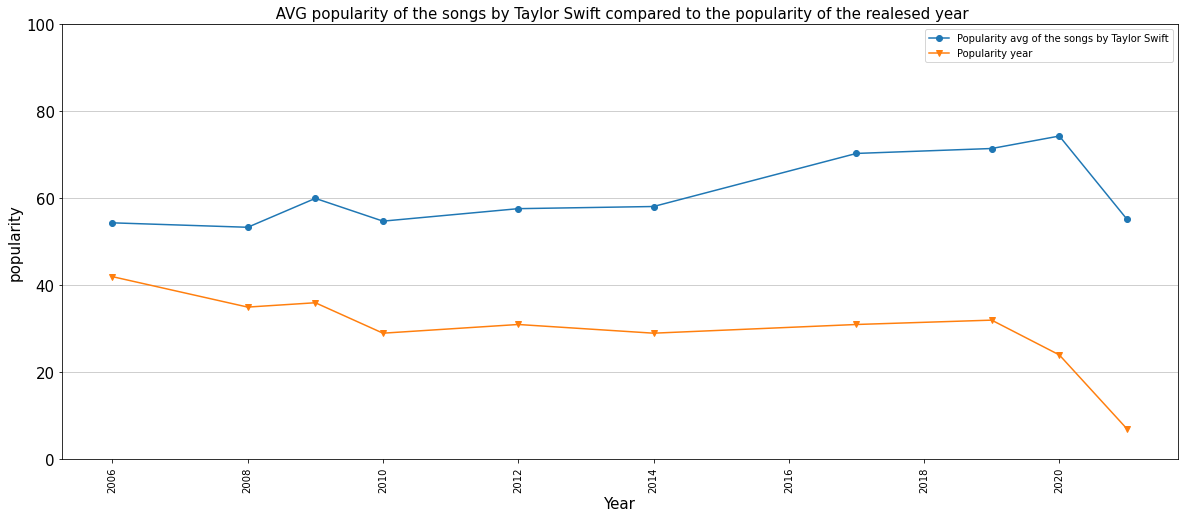

In [33]:
plt.figure(figsize=[20,8])
plt.plot(p_year, pop_mean, '-o')
plt.plot(p_year,popularity_y,'-v')
plt.ylim(0,100)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Year',fontsize=15)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('popularity',fontsize=15)
plt.title(' AVG popularity of the songs by Taylor Swift compared to the popularity of the realesed year',fontsize=15)
plt.legend(['Popularity avg of the songs by Taylor Swift', 'Popularity year'])
plt.show()

# Q9: number of popular and not popular songs by popular artists

In [34]:
result_q9 = list(session.run("\
MATCH (p:songs_popular)-[:BY]->(a:artist_popular)<-[:BY]-(n:songs_not_popular) \
RETURN a.artists_a, count(DISTINCT p.name) as popular_songs, count(DISTINCT n.name) as not_popular_songs;"))

In [35]:
result_q9

[<Record a.artists_a='Lil Nas X' popular_songs=1 not_popular_songs=2>,
 <Record a.artists_a='Olivia Rodrigo' popular_songs=2 not_popular_songs=1>]

In [36]:
artist       = []
popular_songs     = []
not_popular_songs = []
for item in range(len(result_q9)):
    artist.append(result_q9[item][0])
    popular_songs.append(result_q9[item][1])
    not_popular_songs.append(result_q9[item][2])
d_9 = {'Artists': artist, 'popular songs':popular_songs, 'not popular songs':not_popular_songs}
data_9 = pd.DataFrame(d_9)
data_9

,Artists,popular songs,not popular songs
0,Lil Nas X,1,2
1,Olivia Rodrigo,2,1


# Q10: percentage of songs' keys in the year 2020

In [37]:
result_q10 = list(session.run("\
MATCH (x)-[:HAS_DATA]->(s:songs_stat) \
WHERE x.year=2020 WITH TOFLOAT(COUNT(*))/100 as d, COLLECT(s.key) AS stats UNWIND stats AS stat WITH d, stat \
RETURN stat, COUNT(*) AS tot, COUNT(*)/d AS percentage ORDER BY stat;"))

In [38]:
result_q10

[<Record stat=0 tot=1317 percentage=11.468129571577848>,
 <Record stat=1 tot=1057 percentage=9.204110066179032>,
 <Record stat=2 tot=1126 percentage=9.804946011842564>,
 <Record stat=3 tot=224 percentage=1.9505398815743642>,
 <Record stat=4 tot=804 percentage=7.001044932079415>,
 <Record stat=5 tot=936 percentage=8.150470219435736>,
 <Record stat=6 tot=768 percentage=6.687565308254963>,
 <Record stat=7 tot=1207 percentage=10.51027516544758>,
 <Record stat=8 tot=708 percentage=6.165099268547544>,
 <Record stat=9 tot=1457 percentage=12.687216997561825>,
 <Record stat=10 tot=1035 percentage=9.012539184952978>,
 <Record stat=11 tot=845 percentage=7.358063392546151>]

In [39]:
key      = []
tot     = []
perc = []
for item in range(len(result_q10)):
    key.append(result_q10[item][0])
    tot.append(result_q10[item][1])
    perc.append(result_q10[item][2])
d_10 = {'Key':key, 'Total songs':tot, 'Percentage':perc}
data_10 = pd.DataFrame(d_10)
data_10.sort_values(by=['Total songs'])

,Key,Total songs,Percentage
3,3,224,1.950540
8,8,708,6.165099
6,6,768,6.687565
4,4,804,7.001045
11,11,845,7.358063
5,5,936,8.150470
10,10,1035,9.012539
1,1,1057,9.204110
2,2,1126,9.804946
7,7,1207,10.510275


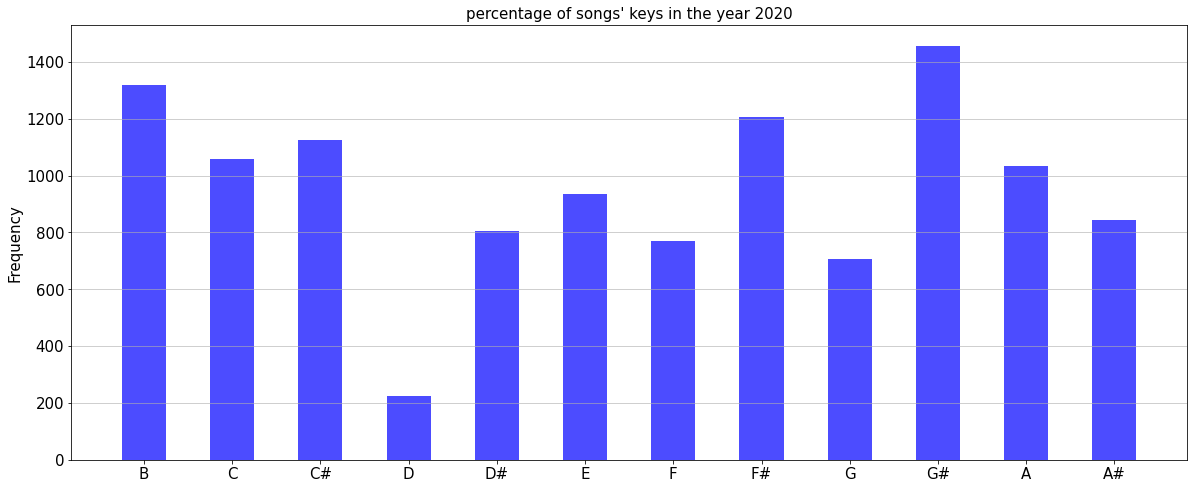

In [40]:
plt.figure(figsize=[20,8])
plt.grid(axis='y', alpha=0.75)
x_1  = np.array([0,1, 2, 3, 4, 5, 6, 7,8,9,10,11])
my_xticks = ["B", "C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#"]
plt.xticks(x_1, my_xticks, rotation = 0)
plt.bar(key,tot, width = 0.5, color='blue',alpha=0.7)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("percentage of songs' keys in the year 2020",fontsize=15)
plt.show()